In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def gnd(lop):
    nx=101
    nm=4
    x = np.zeros(nx+2)
    fnew = np.zeros(nx+2)
    f = np.zeros(nx+2)
    pot = np.zeros(nx+2)
    fmom = np.zeros(nm+1)
    hmom = np.zeros(nm+1)
    Nsteps = 15000
    nout   = 200
    main = []
    ptracker = []
    ptracker2 = []
    mvar = []
    qp = []
    fstar = np.zeros(nx+2)
    qpot = np.zeros(nx+2)
    tt = []
    lop = lop
    sizex  = 10.0
    dx     = sizex/float(nx-1)
    dif    = 1.0
    vel    = 0.0
    vamp   = 1.0   
    cfl   = 0.10
    dtd   = 1.0
    if(dif !=0.0):
        dtd = dx*dx/dif
    dta   = 1.0
    if(vel != 0.0):
        dta = dx/vel
    dtc   = 1.0
    if(vamp !=0.0):
        dtc = 1.0/(vamp*sizex*sizex)

    dt    = cfl*min(min(dta,dtd),dtc)

    alfa   = vel*dt/dx
    delta  = dif*dt/(dx*dx)
    
    wid = 1
    # define potential and function
    for j in range(1,nx+2): 
        pot[j] = 0
        x[j]   = dx*float(j-1-nx/2)
        xj     = x[j]/wid

        f[j]   = (1.0+0.5*xj)*np.exp(-0.5*xj*xj)
        if lop == 0:
            pot[j] = 2*0.5*vamp*x[j]*x[j]
        if lop == 1:
            xi = -3.
            xf = 3.
            if (x[j]<xi) or (x[j]>xf):
                pot[j] = 100
    print(dt,dx)
    # Normalizing
    coef = 0
    for j in range(1,nx+1): 
        coef = coef + dx*f[j]*f[j]
    for j in range(1,nx+1): 
        f[j] /= np.sqrt(coef)
    
    for tim in range(1,Nsteps):
        time = (tim-1)*dt
        f[0]    = f[nx]
        f[nx+1] = f[1]
        for j in range(1,nx+1):
            a = delta+0.5*alfa
            b = delta-0.5*alfa
            c = 1.0-a-b-pot[j]*dt
            fnew[j] = a*f[j-1]+c*f[j]+b*f[j+1]

        for j in range(1,nx+1):
            f[j] = fnew[j]
        main.append(np.copy(f))
                
        if(np.mod(tim,nout) == 1):
            for m in range(nm+1):
                fmom[m] = 0.0
                hmom[m] = 0.0
            # track point 
            ptracker.append(np.copy(f[50]))
            for j in range(1,nx+1):
                if f[j] > 10**(-8):
                    pass
                    #qpot[j]= np.sqrt(f[j-1])-2.0*np.sqrt(f[j])+np.sqrt(f[j+1])
                    #qpot[j]=-qpot[j]/(dx*dx*np.sqrt(f[j]))
                else:
                    qpot[j]=0.0

                fj = f[j]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1]+ fj*x[j]*dx
                fmom[2] = fmom[2]+ fj*x[j]*x[j]*dx
                hmom[2] = hmom[2] + fj*fj*dx
                fmean = fmom[1]/fmom[0]
                fvar  = fmom[2]/fmom[0]-fmean*fmean
            mvar.append((np.copy(fmom[0]),np.copy(fmean),fvar))
            qp.append(np.copy(qpot))
            tt.append(time)
    return main,mvar,x,pot,tt,qp,ptracker

0.001 0.1


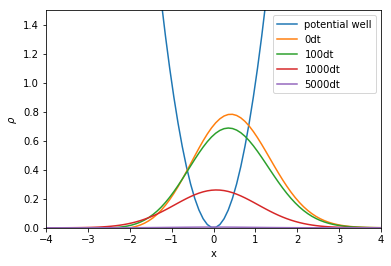

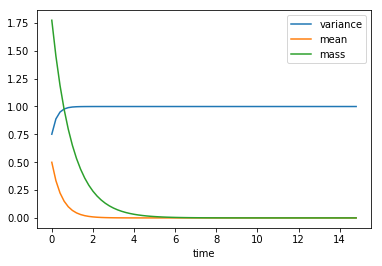

In [8]:
main,mvar,x,pot,tt,qp,ptracker = gnd(0)
main = np.array(main)
plt.figure()
plt.plot(x[1:-1],pot[1:-1],label = 'potential well')
plt.plot(x[1:-1],main[0,1:-1],label = '0dt')
plt.plot(x[1:-1],main[100,1:-1],label = '100dt')
plt.plot(x[1:-1],main[1000,1:-1],label = '1000dt')
plt.plot(x[1:-1],main[5000,1:-1],label = '5000dt')
plt.ylim([0,1.5])
plt.xlim([-4,4])
plt.ylabel(r'$\rho$')
plt.xlabel('x')
plt.legend()

mvar = np.array(mvar)
plt.figure()
plt.plot(tt,mvar[:,2],label = 'variance')
plt.plot(tt,mvar[:,1],label = 'mean')
plt.plot(tt,mvar[:,0],label = 'mass')
plt.legend()
plt.xlabel('time')



-0.999874316292 -0.356953605625


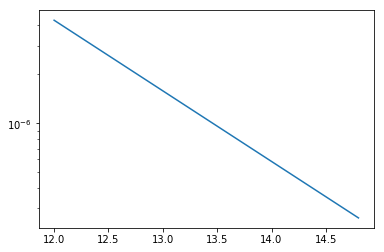

In [9]:
tt = np.array(tt)
dt = 0.001
dx = 0.1
nx = 101
id1 = 60
ptracker = np.array(ptracker)
plt.semilogy(tt[id1:],ptracker[id1:])
a, b = np.polyfit(tt[id1:],np.log(ptracker[id1:]),1)
print(a,b)
fzed = np.copy(main[14000,:]/np.exp(a  *14000*dt))


coef = 0
for j in range(1,nx+1): 
    coef = coef + dx*fzed[j]*fzed[j]
for j in range(1,nx+1): 
    fzed[j]  /=  np.sqrt(coef)


0.9999999999975705

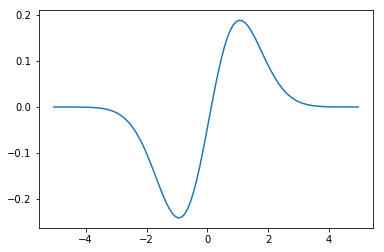

In [10]:
plt.plot(x[1:-1],main[0,1:-1]-fzed[1:-1])
np.trapz(fzed[1:-1]**2,dx=dx)

In [11]:

nx=501
nm=4
x = np.zeros(nx+2)
fnew = np.zeros(nx+2)
f = np.zeros(nx+2)
pot = np.zeros(nx+2)
fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
Nsteps = 40000
nout   = 200
lop = 0
main = []
ptracker = []
mvar = []
qp = []
fstar = np.zeros(nx+2)
qpot = np.zeros(nx+2)
tt = []
lop = lop
sizex  = 10.0
dx     = sizex/float(nx-1)
dif    = 1.0
vel    = 0.0
vamp   = 1.0   
cfl   = 0.10
dtd   = 1.0
if(dif !=0.0):
    dtd = dx*dx/dif
dta   = 1.0
if(vel != 0.0):
    dta = dx/vel
dtc   = 1.0
if(vamp !=0.0):
    dtc = 1.0/(vamp*sizex*sizex)

dt    = cfl*min(min(dta,dtd),dtc)

alfa   = vel*dt/dx
delta  = dif*dt/(dx*dx)

wid = 1
for j in range(1,nx+2): 
    pot[j] = 0
    x[j]   = dx*float(j-1-nx/2)
    xj     = x[j]/wid

    f[j]   = (1.0+0.5*xj)*np.exp(-0.5*xj*xj) 
    if lop == 0:
        pot[j] = 2*0.5*vamp*x[j]*x[j]
    if lop == 1:
        xi = -3.
        xf = 3.
        if (x[j]<xi) or (x[j]>xf):
            pot[j] = 100

# normalize f
coef = 0
for j in range(1,nx+1): 
    coef = coef + dx*f[j]*f[j]
for j in range(1,nx+1): 
    f[j] /= np.sqrt(coef)

# subtract normalized fzed
for j in range(1,nx+1): 
    f[j] = f[j]-fzed[j]

cc = (np.trapz(f[1:-1]*f[1:-1],dx=dx))   
f = f/cc
    
for tim in range(1,Nsteps):
    time = (tim-1)*dt
    f[0]    = f[nx]
    f[nx+1] = f[1]
    for j in range(1,nx+1):
        a = delta+0.5*alfa
        b = delta-0.5*alfa
        c = 1.0-a-b-pot[j]*dt
        fnew[j] = a*f[j-1]+c*f[j]+b*f[j+1]

    for j in range(1,nx+1):
        f[j] = fnew[j]
    main.append(np.copy(f))
    
    if(np.mod(tim,nout) == 1):
        for m in range(nm+1):
            fmom[m] = 0.0
            hmom[m] = 0.0

        ptracker.append(np.copy(f[50]))
        for j in range(1,nx+1):
            if f[j] > 10**(-8):
                qpot[j]= np.sqrt(f[j-1])-2.0*np.sqrt(f[j])+np.sqrt(f[j+1])
                qpot[j]=-qpot[j]/(dx*dx*np.sqrt(f[j]))
            else:
                qpot[j]=0.0

            fj = f[j]
            fmom[0] = fmom[0] + fj*dx
            fmom[1] = fmom[1]+ fj*x[j]*dx
            fmom[2] = fmom[2]+ fj*x[j]*x[j]*dx
            hmom[2] = hmom[2] + fj*fj*dx
            fmean = fmom[1]/fmom[0]
            fvar  = fmom[2]/fmom[0]-fmean*fmean
        mvar.append((np.copy(fmom[0]),np.copy(fmean),fvar))
        qp.append(np.copy(qpot))
        tt.append(tim)


IndexError: index 103 is out of bounds for axis 0 with size 103

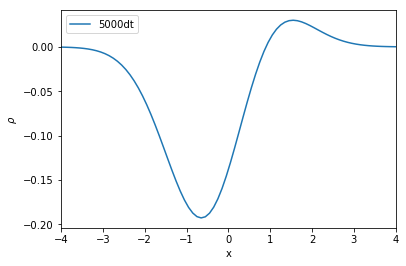

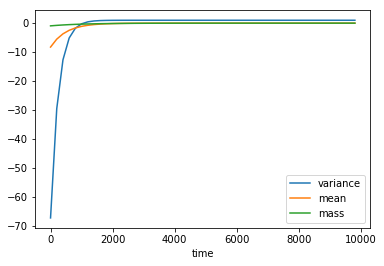

In [17]:
main = np.array(main)
plt.figure()
#plt.plot(x[1:-1],pot[1:-1],label = 'potential well')
#plt.plot(x[1:-1],main[0,1:-1],label = '0dt')
#plt.plot(x[1:-1],main[100,1:-1],label = '100dt')
#plt.plot(x[1:-1],main[1000,1:-1],label = '1000dt')
plt.plot(x[1:-1],main[1000,1:-1],label = '5000dt')
#plt.ylim([-0.5,0.5])
plt.xlim([-4,4])
plt.ylabel(r'$\rho$')
plt.xlabel('x')
plt.legend()

mvar = np.array(mvar)
plt.figure()
plt.plot(tt,mvar[:,2],label = 'variance')
plt.plot(tt,mvar[:,1],label = 'mean')
plt.plot(tt,mvar[:,0],label = 'mass')
plt.legend()
plt.xlabel('time')



-0.00103045303848 -0.782846801264


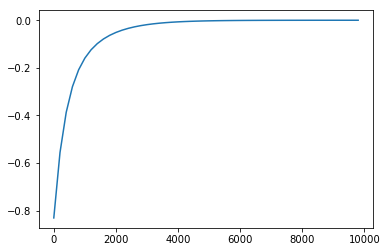

In [19]:
tt = np.array(tt)
idx = 0
ptracker = np.array(ptracker)
plt.plot(tt[idx:],ptracker[idx:])
a, b = np.polyfit(tt[idx:],np.log(-ptracker[idx:]),1)
# tt = np.array(tt)
# plt.semilogy(tt[30:],np.exp(b)*np.exp(a*tt[30:]),'o')
print(a,b)
